#### Imports


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score


### Lectura de dades


In [12]:
import pandas as pd

a2text = pd.read_csv('data/A2-synthetic.txt')

display(a2text)

,x1,x2,x3,x4,class
0,-0.031676,-9.912054,-0.579436,-1.044239,1
1,0.002526,6.172456,3.288339,-1.006427,5
2,0.183123,-0.387841,6.236470,-1.691491,2
3,-0.042262,-1.996272,-1.655302,-2.995311,1
4,-0.062811,-0.417072,6.657475,-3.633134,4
...,...,...,...,...,...
355,-0.340733,8.504536,7.903644,-2.032197,6
356,-0.024928,1.551977,6.361992,-0.757714,2
357,-0.668529,-0.607597,0.639295,4.329213,6
358,-0.122711,-5.516957,-2.111173,2.209675,3


### PreProcessament


In [7]:
# Load data
a2text = pd.read_csv('data/A2-synthetic.txt')

# Separate features and labels
X = a2text.drop(columns=['class'])
y = a2text['class']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### PCA


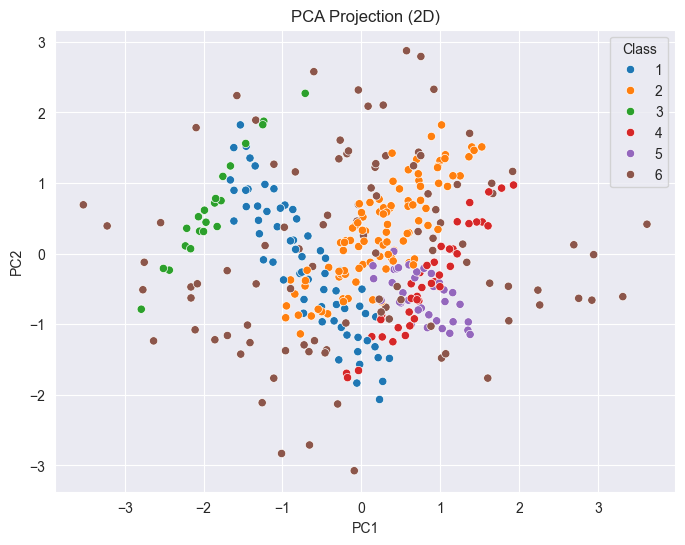

In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot PCA projection
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='tab10')
plt.title('PCA Projection (2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Class')
plt.grid(True)
plt.show()


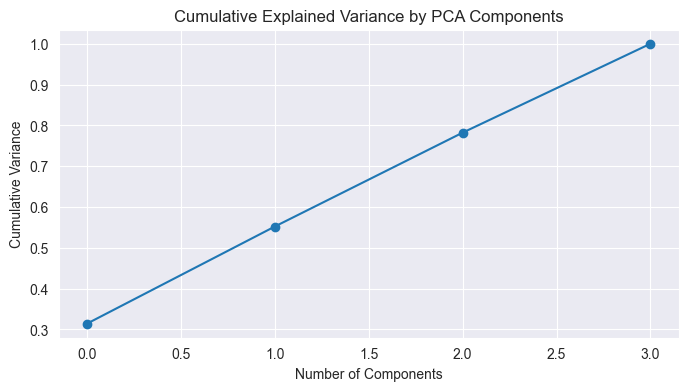

In [9]:
pca_full = PCA().fit(X_scaled)
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.grid(True)
plt.show()


### t-SNE


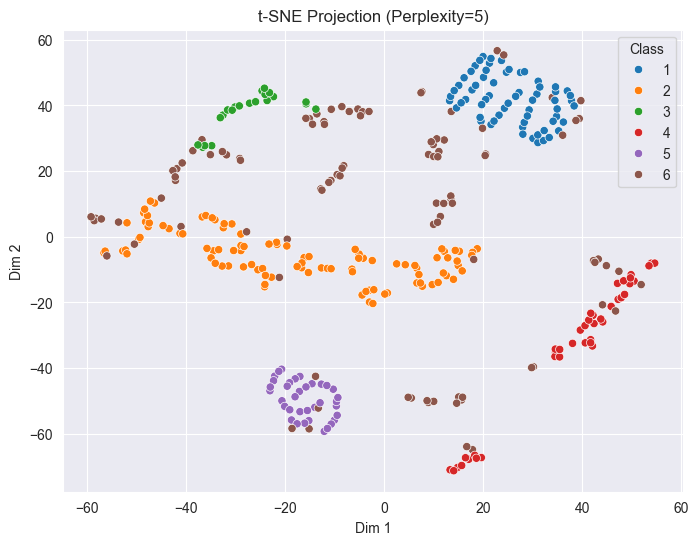

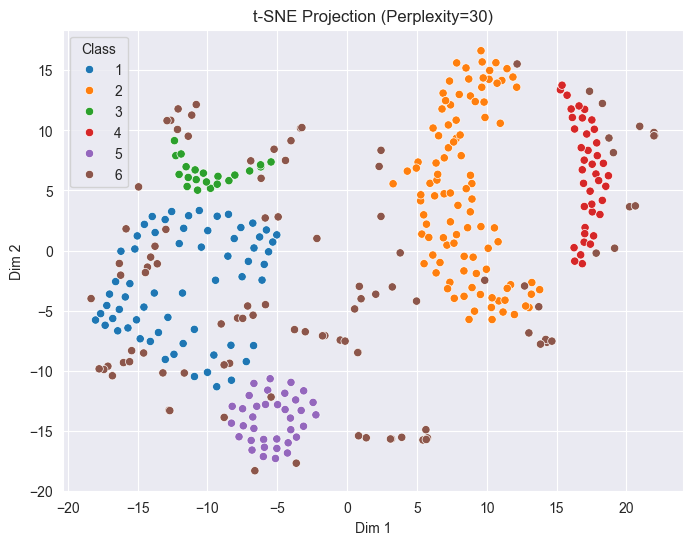

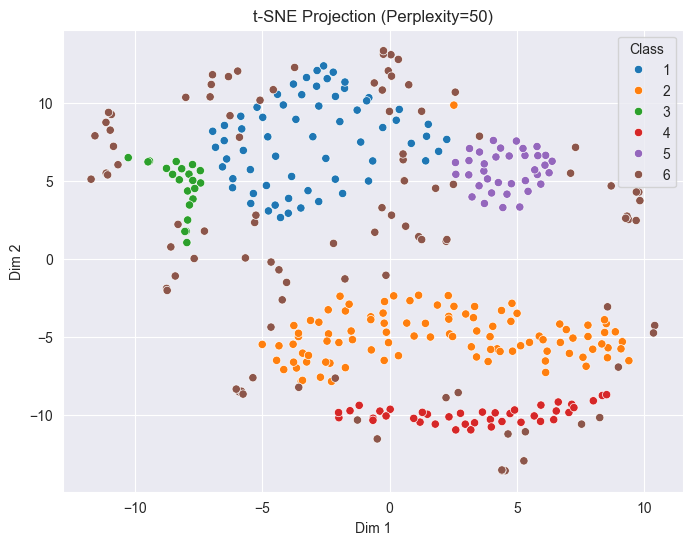

In [10]:
for perplexity in [5, 30, 50]:
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=0)
    X_tsne = tsne.fit_transform(X_scaled)

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='tab10')
    plt.title(f't-SNE Projection (Perplexity={perplexity})')
    plt.xlabel('Dim 1')
    plt.ylabel('Dim 2')
    plt.legend(title='Class')
    plt.grid(True)
    plt.show()


### k-means Clustering

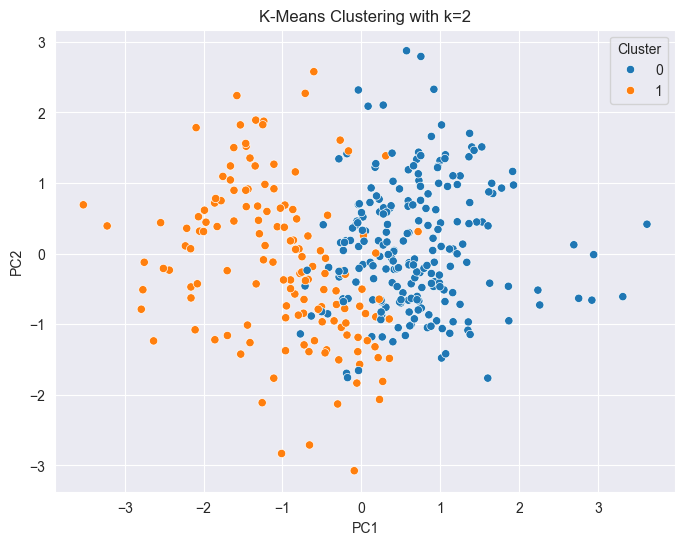

Adjusted Rand Index for k=2: 0.196


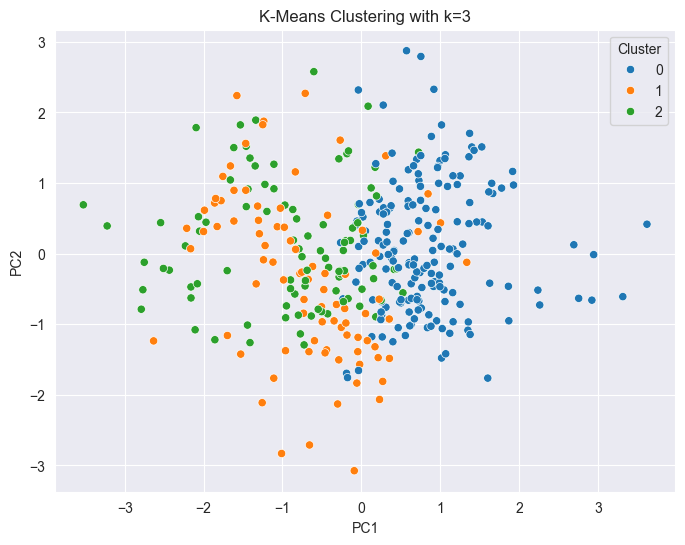

Adjusted Rand Index for k=3: 0.135


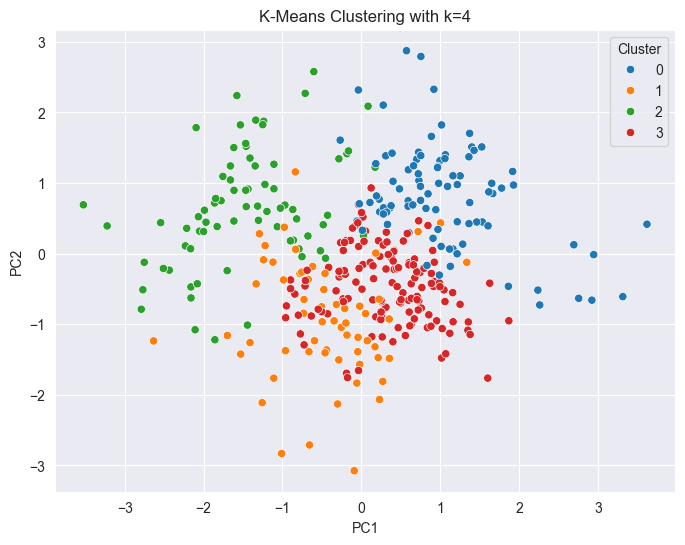

Adjusted Rand Index for k=4: 0.184


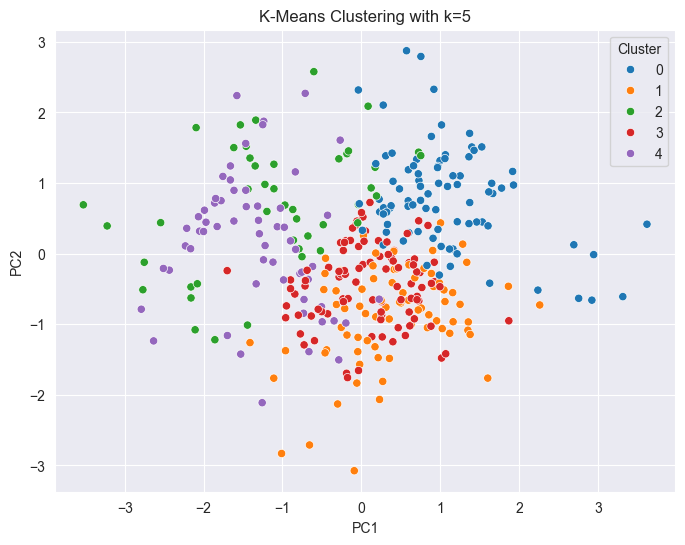

Adjusted Rand Index for k=5: 0.229


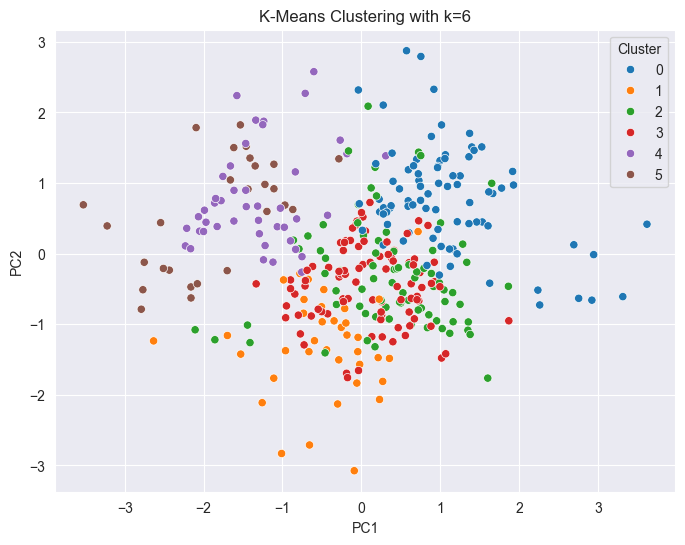

Adjusted Rand Index for k=6: 0.223


In [11]:
K = len(np.unique(y))

for k in range(2, K+1):
    kmeans = KMeans(n_clusters=k, random_state=0)
    clusters = kmeans.fit_predict(X_scaled)

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='tab10')
    plt.title(f'K-Means Clustering with k={k}')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()

    # Optional: compare to real classes
    ari = adjusted_rand_score(y, clusters)
    print(f'Adjusted Rand Index for k={k}: {ari:.3f}')
